In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# set formatting standards that can be applied using applymap()
format_int = "{0:,.0f}".format
format_float = "{:,.6f}".format
format_cur = "${:,.2f}".format

In [24]:
# Set overall global variables and constant for the analysis
csvfile_path = "data"
output_Img_path = "Images"
# chart color scheme to be used
color_used = {'Rural':'Gold', 'Suburban':'lightskyblue','Urban':'lightcoral'}

In [5]:
# load City and Ride data csv files and merge them into one dataframe

file_to_load = ["city_data.csv","ride_data.csv"]

city_DF,ride_DF = [pd.read_csv(os.path.join(csvfile_path,file)) for file in file_to_load]

alldata_DF = pd.merge(city_DF,ride_DF, how = 'right', on = ['city'])

alldata_DF.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [137]:
# Check for any NAs or missing values in the file and remove them before proceeding
alldata_cleanDF = alldata_DF if alldata_DF.isnull().values.sum() == 0 else alldata_DF.dropna(how = 'any')

In [135]:
# Calculate Average Fare ($), Total Number of Rides, Total Number of Drivers Per City and City Type (Urban, Suburban, Rural)
# group by city to get the avg fare, sum of rides, total drivers

cityGrp = alldata_cleanDF[['city','type','driver_count','fare','ride_id']].groupby(['type','city'])

# Create the summary dataframe that rolls up value by City and City Type
city_SDF = pd.DataFrame({'Type' : cityGrp['type'].max(),
                         'City' : cityGrp['city'].max(),
                        'Driver_Count' : cityGrp['driver_count'].mean(),
                        'Total Rides' : cityGrp['ride_id'].count(),
                        'Avg Fare' : cityGrp['fare'].mean(),
                         'Total Fare': cityGrp['fare'].sum()
})



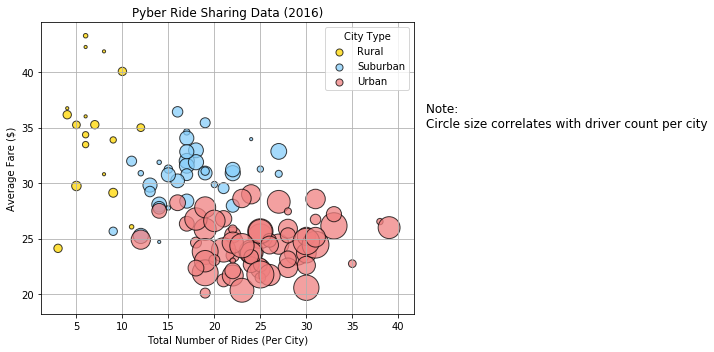

In [136]:
# Create a scatter plot to show the distribution of Pyber sharing across cities that are gruped under Rural, Urban, Suburban

figure = plt.figure(figsize = (6,5))

for city_type in city_SDF['Type'].unique():
    plt.scatter('Total Rides', 'Avg Fare', data = city_SDF.loc[city_SDF['Type'] == city_type,:], \
                s = city_SDF.loc[city_SDF['Type'] == city_type,'Driver_Count']*10,  \
                c = color_used[city_type],edgecolor = 'black', alpha = 0.75, label = city_type, \
                linewidths = 1
               )
lgnd = plt.legend(loc = 'best',title = "City Type", fontsize = 10)

# set a fixed size for legend marker
for l in lgnd.legendHandles:
    l._sizes=[50] 

# Set all text values for the plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(43,35, "Note: \nCircle size correlates with driver count per city", fontsize = 12)
# add gird to the plot
plt.grid()

#Enusre all the plot is visible by using tight_layout to adjust padding
plt.tight_layout()

# Save the plot to a png File
plt.savefig(os.path.join(output_Img_path, "PyberRideSharing_SP.png"), bbox_inches = 'tight')

#display th plot
plt.show()    
    

### Create three pie charts: 
 % of Total Fares by City Type
 % of Total Rides by City Type
 % of Total Drivers by City Type

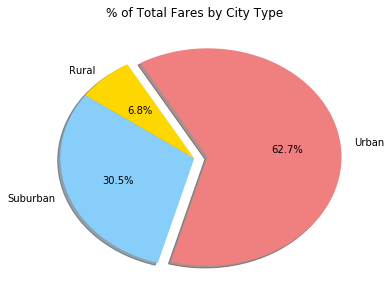

In [42]:
# pie chart for % of Total Fares by City Type
plt.figure(figsize = (6,5))
pieFig1 = plt.pie(city_SDF[['Type','Total Fare']].groupby('Type').sum(), explode = (0, 0, 0.1), \
                  labels = city_SDF['Type'].unique(), colors=color_used.values(), autopct = "%1.1f%%", \
                  shadow = True, startangle = 120)

plt.title("% of Total Fares by City Type")

plt.savefig(os.path.join(output_Img_path, "TotalFares_percent_byType.png"))

plt.show()


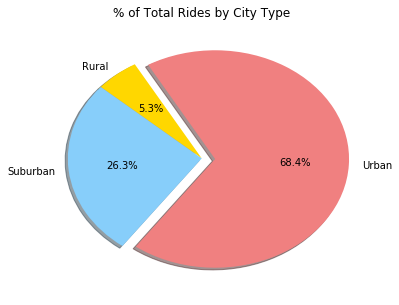

In [43]:
# pie chart for % of Total Rides by City Type
plt.figure(figsize = (6,5))
pieFig1 = plt.pie(city_SDF[['Type','Total Rides']].groupby('Type').sum(), explode = (0, 0, 0.1), \
                  labels = city_SDF['Type'].unique(), colors=color_used.values(), autopct = "%1.1f%%", \
                  shadow = True, startangle = 120)
plt.title("% of Total Rides by City Type")


plt.savefig(os.path.join(output_Img_path, "TotalRides_percent_byType.png"))

plt.show()

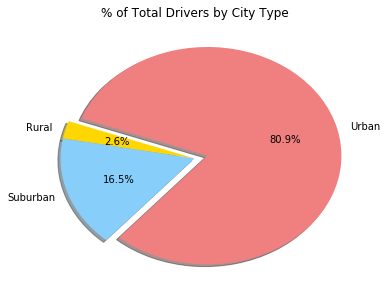

In [49]:
# pie chart for % of Total Drivers by City Type
plt.figure(figsize = (6,5))
pieFig1 = plt.pie(city_SDF[['Type','Driver_Count']].groupby('Type').sum(), explode = (0, 0, 0.1), \
                  labels = city_SDF['Type'].unique(), colors=color_used.values(), autopct = "%1.1f%%", \
                  shadow = True, startangle = 160)
plt.title("% of Total Drivers by City Type")


plt.savefig(os.path.join(output_Img_path, "TotalDrivers_percent_byType.png"))

plt.show()